In [68]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


In [3]:
cropdf = pd.read_csv("Crop_recommendation.csv")
cropdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
cropdf.shape

(2200, 8)

In [5]:
cropdf.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
#Null values
cropdf.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [9]:
cropdf["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
len(cropdf["label"].unique())

22

In [12]:
cropdf.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

<AxesSubplot:>

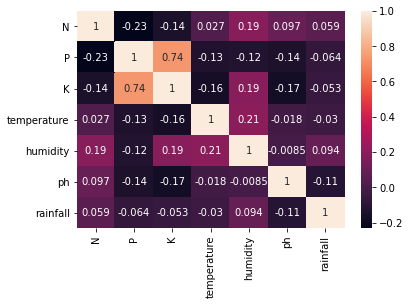

In [14]:
#Correlation between different features
sns.heatmap(cropdf.corr(),annot=True)


In [20]:
#Data Visualization and analysis

crop_summary = pd.pivot_table(cropdf,index=['label'],aggfunc='mean')


crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
    }

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [21]:

crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' :crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
    }

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [22]:

crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' :crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
    }

fig.add_trace(
    go.Bar(top,
           name="Most Potassium required",
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least Potassium required",
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [23]:
X=cropdf.drop('label', axis=1)
y = cropdf['label']

In [24]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

In [49]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)
predicted_values=DecisionTree.predict(X_test)
acc.append(metrics.accuracy_score(y_test, predicted_values))
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", metrics.accuracy_score(y_test, predicted_values))

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  0.9121212121212121
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.65      1.00      0.78        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.90      0.95        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.23      0.37        31
 kidneybeans       1.00      0.81      0.89        26
      lentil       0.88      1.00      0.94        22
       maize       0.71      0.81      0.76        27
       mango       1.00      0.93      0.96        28
   mothbeans       1.00      0.50      0.67        36
    mungbean       0.94      1.00      0.97        29
   muskmelon       0.97      1.00      0.98        30
      orange       1.00      1.0

In [30]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [50]:
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [37]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

acc.append(metrics.accuracy_score(y_test, predicted_values))
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", metrics.accuracy_score(y_test, predicted_values))

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.84      0.87      0.86        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.84      0.96      0.90        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.91      0.91        22
       maize       0.92      0.81      0.86        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.81      0.81      0.81        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1

In [38]:

score = cross_val_score(LogReg, X, y,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [39]:

LR_pkl_filename = 'LogisticRegression.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

In [40]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier(n_estimators=20, random_state=0)
randf.fit(X_train,y_train)
predicted_values = randf.predict(X_test)
acc.append(metrics.accuracy_score(y_test, predicted_values))
model.append('Random Forest')
print("Random Forest's Accuracy is: ", metrics.accuracy_score(y_test, predicted_values))

print(classification_report(y_test,predicted_values))

Random Forest's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.97      0.98        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.0

In [42]:

score = cross_val_score(randf, X, y,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [43]:

RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(randf, RF_Model_pkl)
RF_Model_pkl.close()

In [45]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)
acc.append(metrics.accuracy_score(y_test, predicted_values))
model.append('XGBoost')
print("XGBoost's Accuracy is: ", metrics.accuracy_score(y_test, predicted_values))

print(classification_report(y_test,predicted_values))

[19:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      1.00      0.98        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       0.97      1.00      0.98        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.90      0.95        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      0.95      0.98        2

In [46]:

score = cross_val_score(XB, X, y,cv=5)
score

[19:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

In [47]:

XB_pkl_filename = 'XGBoost.pkl'
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
XB_Model_pkl.close()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

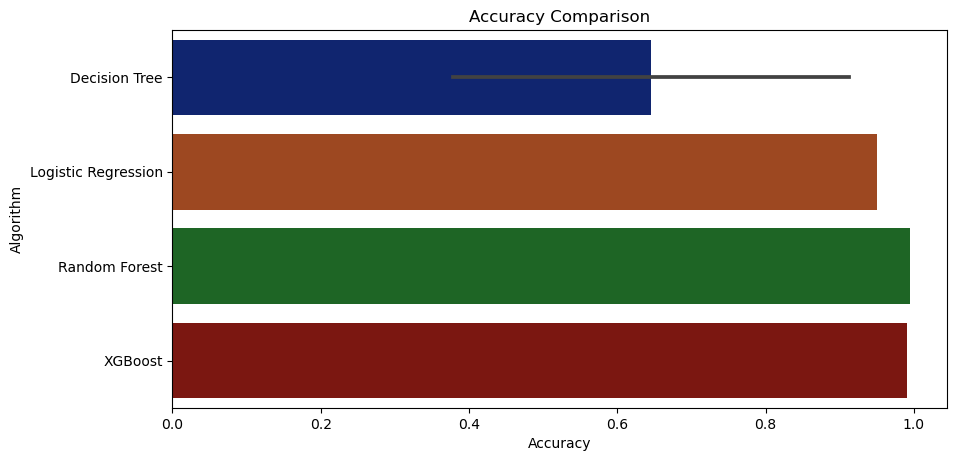

In [51]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [52]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9121212121212121
Logistic Regression --> 0.95
Random Forest --> 0.9954545454545455
XGBoost --> 0.990909090909091


In [61]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = randf.predict(data)
print(prediction)

['coffee']


In [62]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = randf.predict(data)
print(prediction)

['jute']


In [67]:
data = np.array([[90, 42, 43, 20.879744, 75, 5.5,220]])
prediction = randf.predict(data)
print(prediction)

['rice']
